In [1]:
## imports
import sys
import os
import numpy as np
import xarray as xr
import cmocean
import matplotlib
import matplotlib.pyplot as plt
import xesmf as xe
import matplotlib.colors as colors
import cartopy
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib import gridspec
import cartopy.mpl.ticker as cticker
import scipy
import scipy.stats
import gsw
from defs import smm

In [2]:
folder = 'Data_processed/'
modellist =  ['CCSM4-UoT', 'CESM2', 'IPSL-CM5A2', 'MIROC4m', 'COSMOS', 'HadCM3', 'NorESM1-F']

In [3]:
#Open temperature datasets and calculate SMM
dsE280t, dsE400t, dsEoi400t = xr.open_dataset(folder+'SMM_ensemble/E280/thetao_1x1_100yr.nc'), xr.open_dataset(folder+'SMM_ensemble/E400/thetao_1x1_100yr.nc'), xr.open_dataset(folder+'SMM_ensemble/Eoi400/thetao_1x1_100yr.nc')
sstE280, sstE400, sstEoi400 = smm(dsE280t.thetao[:,0]), smm(dsE400t.thetao[:,0]), smm(dsEoi400t.thetao[:,0])

dsgrid = xr.open_dataset(folder+'1x1grid.nc')
area = dsgrid.area

#Open and calculate MMM sea-ice cover
dsE280 = xr.open_dataset(folder+'SMM_ensemble/E280/SI_100yr.nc')
dsE400 = xr.open_dataset(folder+'SMM_ensemble/E400/SI_100yr.nc')
dsEoi400 = xr.open_dataset(folder+'SMM_ensemble/Eoi400/SI_100yr.nc')

siE280 = smm(dsE280.si_mean)
siE400 = smm(dsE400.si_mean)
siEoi400 = smm(dsEoi400.si_mean)

/var/folders/f4/c_hqzq2n50q925l69wbn3_dw0000gn/T/ipykernel_62304/961314270.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap0 = plt.cm.get_cmap("cmo.thermal",6).copy()
/var/folders/f4/c_hqzq2n50q925l69wbn3_dw0000gn/T/ipykernel_62304/961314270.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap1 = plt.cm.get_cmap("cmo.ice").copy()
/var/folders/f4/c_hqzq2n50q925l69wbn3_dw0000gn/T/ipykernel_62304/961314270.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap2 = p

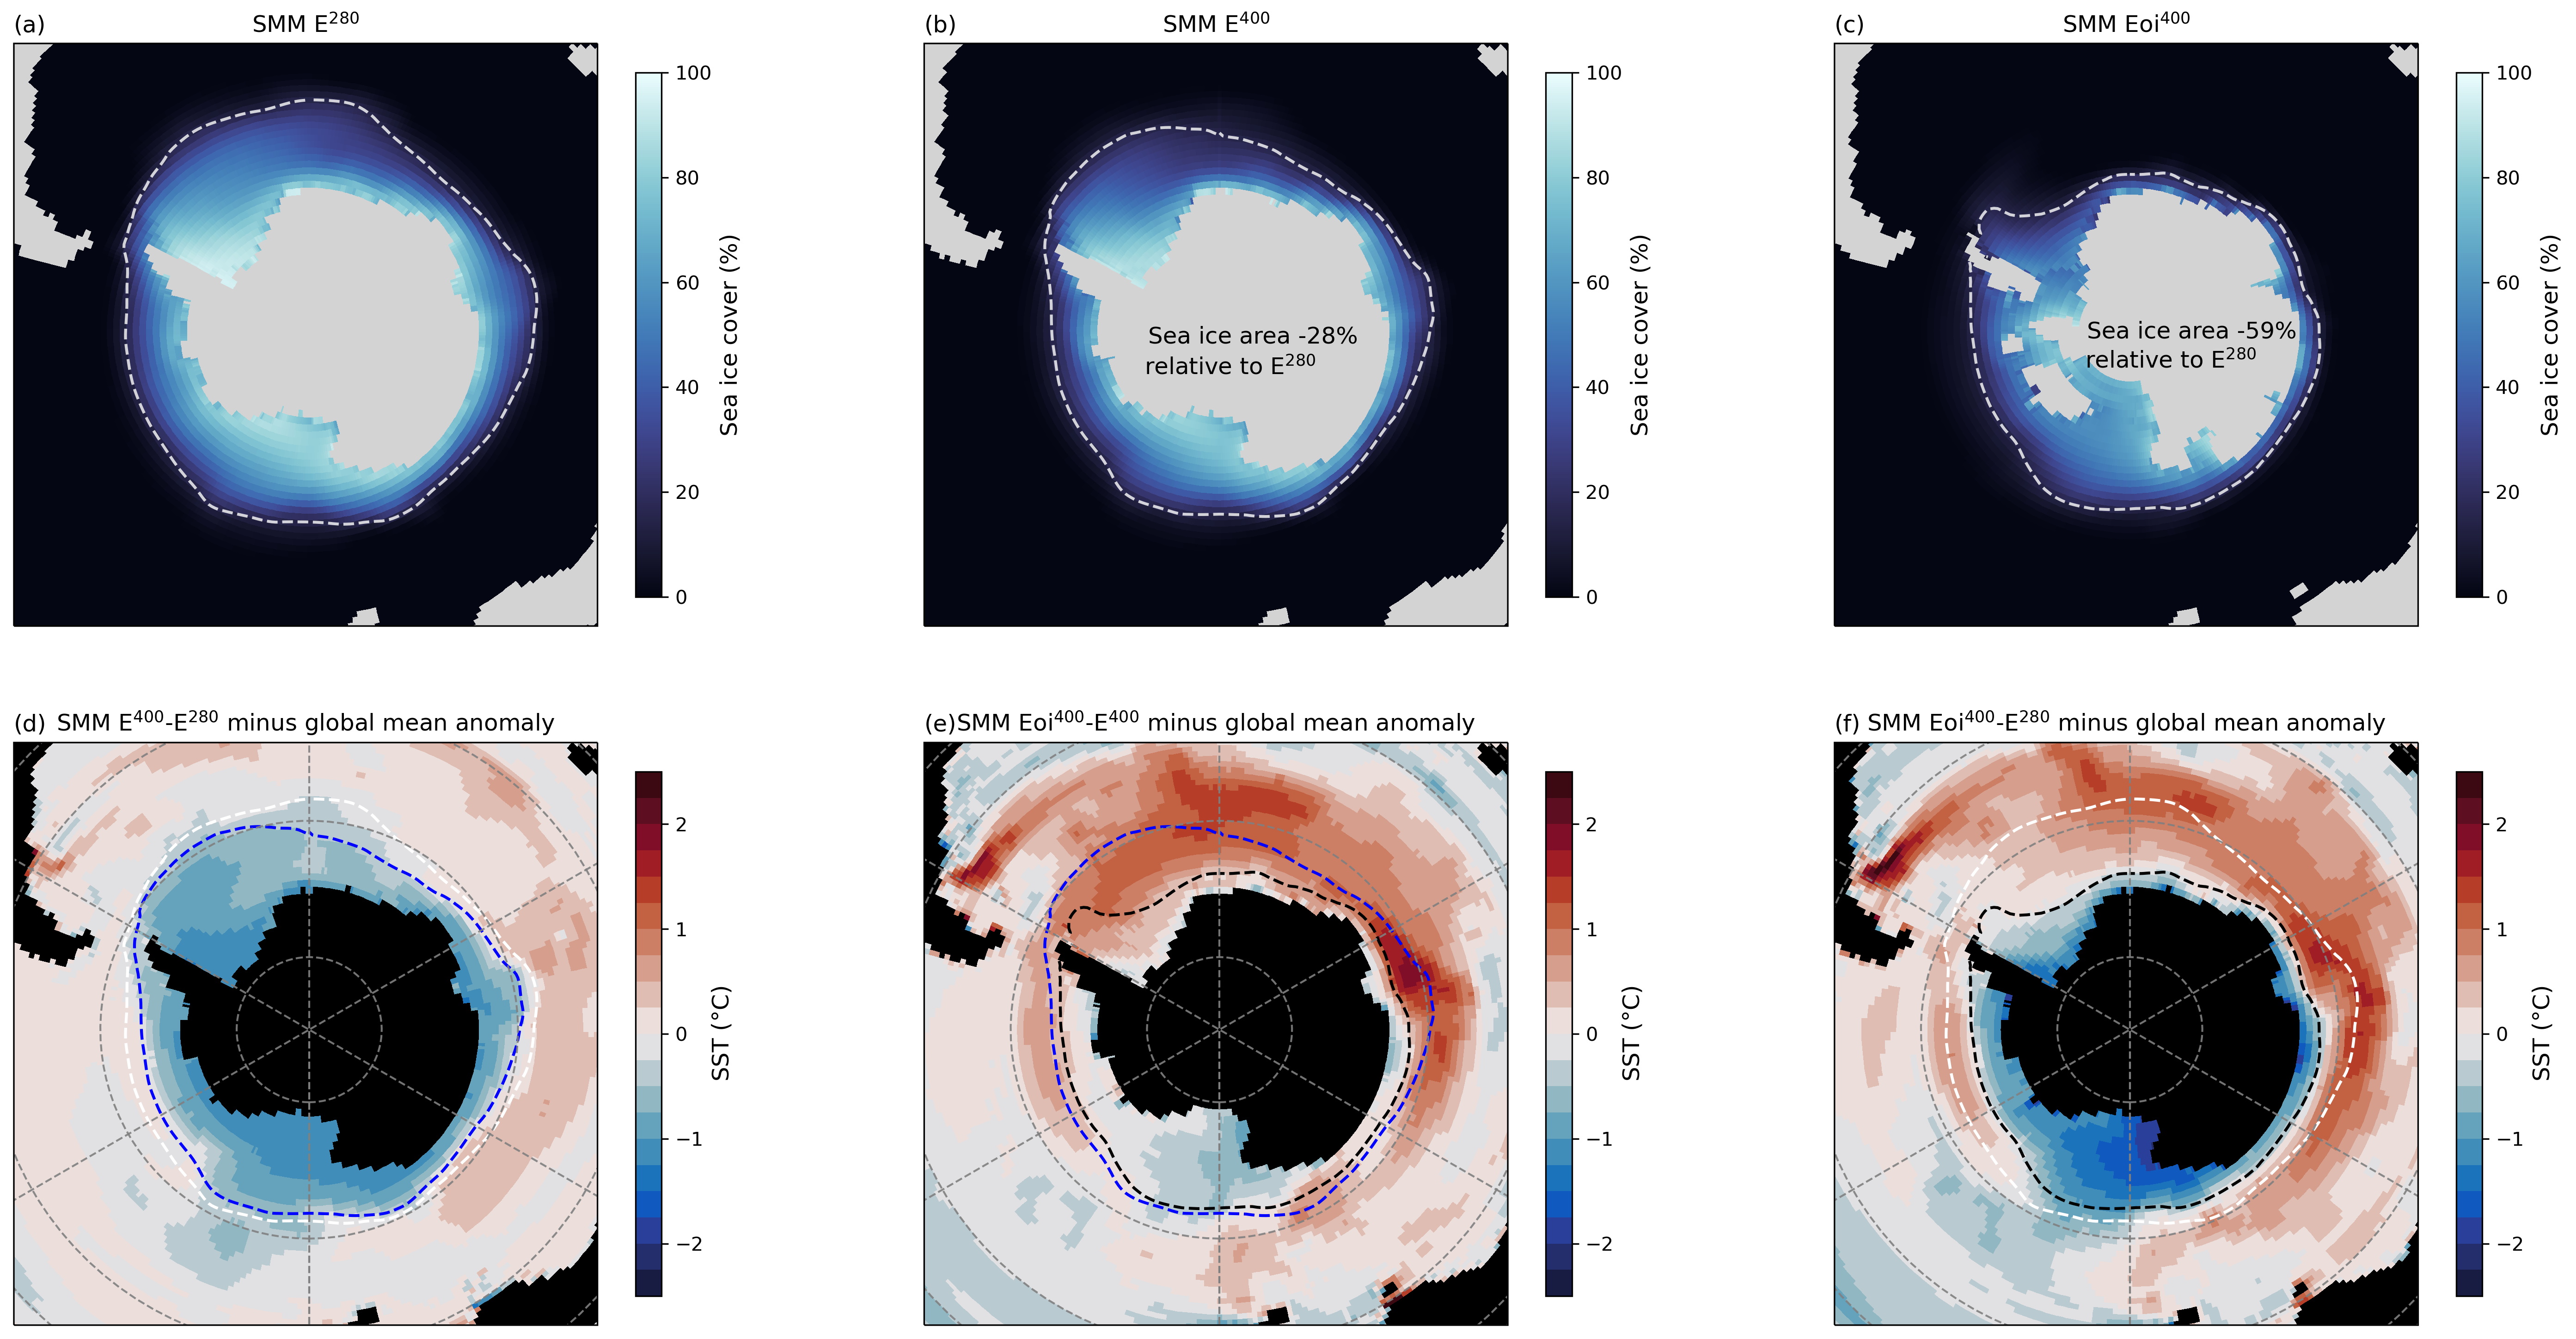

In [4]:
## creeer je figuur:
fig = plt.figure(figsize=(24,12), dpi=300)
## creeer je assen. Ik voeg hier de projectie 'plate carree' toe, Cartopy heeft verschillende, bijv EqualEarth
proj = ccrs.Orthographic(central_longitude=0.0, central_latitude=-90.0)

cmap0 = plt.cm.get_cmap("cmo.thermal",6).copy()
cmap0.set_under('lightgrey')

cmap1 = plt.cm.get_cmap("cmo.ice").copy()
cmap1.set_under('lightgrey')

cmap2 = plt.cm.get_cmap("cmo.balance",20).copy()
cmap2.set_under('black')

iceline = 15

ae400 = ((dsE400.si_mean-dsE280.si_mean).where(dsE280.lat<0)/100*area).mean(dim='model').sum()/(dsE280.si_mean.where(dsE280.lat<0)/100*area).mean(dim='model').sum()
aeoi400 = ((dsEoi400.si_mean-dsE280.si_mean).where(dsE280.lat<0)/100*area).mean(dim='model').sum()/(dsE280.si_mean.where(dsE280.lat<0)/100*area).mean(dim='model').sum()

e280 = siE280.copy()
eoi400 = siEoi400.copy()
e400 = siE400.copy()

ax = fig.add_subplot(231, projection=proj)
im=ax.pcolormesh(e280.lon,e280.lat,e280.fillna(-100), transform=ccrs.PlateCarree(), cmap=cmap1, vmin = 0, vmax = 100)
ax.contour(e280.lon,e280.lat,e280, colors=['w','w'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'Sea ice cover (%)', fontsize=12)
ax.set_title(r'SMM E$^{280}$', loc='center')
ax.set_title(r'(a)', loc='left')

ax = fig.add_subplot(232, projection=proj)
im=ax.pcolormesh(e400.lon,e400.lat,e400.fillna(-100), transform=ccrs.PlateCarree(), cmap=cmap1, vmin = 0, vmax = 100)
ax.contour(e400.lon,e400.lat,e400, colors=['w','w'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'Sea ice cover (%)', fontsize=12)
ax.text(-100,-80,'Sea ice area %.0f%%' %(ae400.values*100), fontsize=12, transform=ccrs.PlateCarree())
ax.text(-120,-78,'relative to E$^{280}$', fontsize=12, transform=ccrs.PlateCarree())
ax.set_title(r'SMM E$^{400}$', loc='center')
ax.set_title(r'(b)', loc='left')

ax = fig.add_subplot(233, projection=proj)
im=ax.pcolormesh(eoi400.lon,eoi400.lat,eoi400.fillna(-100), transform=ccrs.PlateCarree(), cmap=cmap1, vmin = 0, vmax = 100)
ax.contour(eoi400.lon,eoi400.lat,eoi400, colors=['w','w'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=0.8, zorder=1,transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'Sea ice cover (%)', fontsize=12)
ax.set_title(r'SMM Eoi$^{400}$', loc='center')
ax.set_title(r'(c)', loc='left')
ax.text(-100,-84,'Sea ice area %.0f%%' %(aeoi400.values*100), fontsize=12, transform=ccrs.PlateCarree())
ax.text(-130,-82,'relative to E$^{280}$', fontsize=12, transform=ccrs.PlateCarree())


dsst = (sstE400-sstE280)

ax = fig.add_subplot(234, projection=proj)
im=ax.pcolormesh(sstE280.lon,sstE280.lat,(dsst-dsst.weighted(area).mean()).fillna(-200), transform=ccrs.PlateCarree(), cmap=cmap2, vmin = -2.5, vmax = 2.5)
ax.contour(siE280.lon,siE280.lat,siE400, colors=['b','b'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280, colors=['w','w'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'SST ($\degree$C)', fontsize=12)
ax.set_title('SMM E$^{400}$-E$^{280}$ minus global mean anomaly', loc='center')
ax.set_title(r'(d)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')

dsst = (sstEoi400-sstE280)

ax = fig.add_subplot(236, projection=proj)
im=ax.pcolormesh(sstE280.lon,sstE280.lat,(dsst-dsst.weighted(area).mean()).fillna(-200), transform=ccrs.PlateCarree(), cmap=cmap2, vmin = -2.5, vmax = 2.5)
ax.contour(siE280.lon,siE280.lat,siEoi400, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE280, colors=['w','w'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'SST ($\degree$C)', fontsize=12)
ax.set_title('SMM Eoi$^{400}$-E$^{280}$ minus global mean anomaly', loc='center')
ax.set_title(r'(f)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')

dsst = (sstEoi400-sstE400)

ax = fig.add_subplot(235, projection=proj)
im=ax.pcolormesh(sstE280.lon,sstE280.lat,(dsst-dsst.weighted(area).mean()).fillna(-200), transform=ccrs.PlateCarree(), cmap=cmap2, vmin = -2.5, vmax = 2.5)
ax.contour(siE280.lon,siE280.lat,siEoi400, colors=['k','k'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.contour(siE280.lon,siE280.lat,siE400, colors=['b','b'], linestyles = ['dashed'], levels=[-1000,iceline], alpha=1, zorder=1,transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90,-45], crs=ccrs.PlateCarree())
cb = fig.colorbar(im, ax = ax, orientation='vertical', fraction = 0.12, shrink = 0.9)
cb.set_label(label = 'SST ($\degree$C)', fontsize=12)
ax.set_title('SMM Eoi$^{400}$-E$^{400}$ minus global mean anomaly', loc='center')
ax.set_title(r'(e)', loc='left')
lat_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.9, linestyle='--')

#plt.savefig('Fig7.png', bbox_inches='tight')
plt.show()

In [5]:
#SST anomalies and SO amplification

In [6]:
anom = (dsEoi400t.thetao[:,0]-dsE280t.thetao[:,0]) #SST anomaly

glob = (anom).weighted(area).mean(dim=['lat','lon']).mean(dim='model') #Global average SST anomaly
so = (anom).where(anom.lat<=-45).weighted(area).mean(dim=['lat','lon']).mean(dim='model') #SO average SST anomaly

print('Global mean Eoi400-E280 SST anomaly is %.1f degC' %glob)
print('Southern Ocean mean Eoi400-E280  SST anomaly is %.1f degC' %so)
print('Southern Ocean SST Eoi400-E280  amplification index is %.1f' %(so/glob))

Global mean Eoi400-E280 SST anomaly is 2.2 degC
Southern Ocean mean Eoi400-E280  SST anomaly is 2.3 degC
Southern Ocean SST Eoi400-E280  amplification index is 1.1


In [7]:
anom = (dsE400t.thetao[:,0]-dsE280t.thetao[:,0]) #SST anomaly

glob = (anom).weighted(area).mean(dim=['lat','lon']).mean(dim='model').values #Global average SST anomaly
so = (anom).where(anom.lat<=-45).weighted(area).mean(dim=['lat','lon']).mean(dim='model').values #SO average SST anomaly

print('Global mean E400-E280 SST anomaly is %.1f degC' %glob)
print('Southern Ocean mean E400-E280  SST anomaly is %.1f degC' %so)
print('Southern Ocean SST E400-E280  amplification index is %.1f' %(so/glob))

Global mean E400-E280 SST anomaly is 1.2 degC
Southern Ocean mean E400-E280  SST anomaly is 1.1 degC
Southern Ocean SST E400-E280  amplification index is 0.9
